# Question 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('NueBevABTest.csv')

In [3]:
data['Customer Begin'] = pd.to_datetime(data['Customer Begin'])
data['Customer End'] = pd.to_datetime(data['Customer End'], format='%Y-%m-%d')

In [4]:
data['End'] = data['Customer End'].apply(lambda x: x.replace(day=1))
data['Begin'] = data['Customer Begin'].apply(lambda x: x.replace(day=1))

In [5]:
data['Churned'] = data['Churned'].astype('float')

In [6]:
dates = [pd.to_datetime('2011-09'), pd.to_datetime('2017-01')]

In [7]:
import datetime
from dateutil.rrule import rrule, MONTHLY

strt_dt = dates[0]
end_dt = dates[1]

dates = [dt for dt in rrule(MONTHLY, dtstart=strt_dt, until=end_dt)]

In [8]:
dates = sorted(dates)

In [9]:
def within_time_period(start, end, target, churned):
    """
    Return true if the target time is between start and end timestamp
    """
    if (target >= start) and (target < end):
        return False
    elif (target == end) and churned == 0:
        return False
    elif (target == end) and churned == 1:
        return True
    else:
        return None

In [10]:
table = pd.DataFrame(columns=dates, index=range(data.shape[0]))

In [11]:
nrow, ncol  = table.shape

In [12]:
# fill the number to the data. 
for i in range(nrow):
    start = data['Begin'][i]
    end = data['End'][i]
    churned = data['Churned'][i]
    for j in range(ncol):
        result = within_time_period(start, end, dates[j], churned)
        table.iloc[i, j] = result

In [13]:
rates = np.mean(table, axis = 0)[-5:]

## Churn rates for each month

In [14]:
rates

2016-09-01    0.031496
2016-10-01    0.077236
2016-11-01    0.044053
2016-12-01    0.041475
2017-01-01    0.000000
dtype: float64

## Overall churn rate

In [15]:
data.Churned.mean()

0.18110236220472442

# Question 2

AB-test makes sense in this case because we are trying to compare the churn rate of two different groups, and AB-test is a method to give a statistical conclusion. 

Another method can be linear regression that studies the relationship between margin level and churned rate. But it is hard for linear regression to study exactly the behaviors of two groups, in our case, margin 15% and 18%. So an AB-test is neccessary. 


# Quesiton 3

To examine the effect of raising the margin, we would run a AB test to our users. We would use the group of users with 15% margin as our control group, and the group of users with higher margin, 18%, as our experiment group. Then we would study whether the churned rate is the same for these two group of users. The type of A/B testing we will use is test of propotion as the question of interest is the churn rate of the two groups. 

The framework of the A/B test will be designed with following steps: 

1. with the table above, calculate the overal average churn rate grouped by two groups. say the two churn rate is p1 and p2 for control group and experiment group, respectively

2. because for each customer, churn or not is a bernouli trial with $\pi$, the variance of the two churn rate is $\frac{\pi*(1-\pi)}{n}$, where n is the number of total client. Therefore, each p follows the normal distribution: $N(\pi, \frac{\pi*(1-\pi)}{n})$

3. set hypothesis 
$$H_{0}: \pi_{1} = \pi_{2}$$
$$H_{1}: \pi_{1} \neq \pi_{2}$$

4. calculate the statistics of the as $\frac{p_{1}-p_{2}}{\frac{p_{1}-(1-p_{1})}{n_{1}}+\frac{p_{2}-(1-p_{2})}{n_{2}}}$ follows N(0,1)

5. finally compare the statistics against a cutoff point or $\alpha$ level to decide reject $H_{0}$ or not. 

To avoid affecting users, we group the users into different segments by their location and apply let users from one region all be control or test group. 


The potential risk is that users may realize they are in test and are paying different price for the catering food. 

## Question 4

We would run a hypothesis test for a population mean on our data. 

We choose this test because we are trying to study the effect of different margin levels on the churned rate. So we will need to compare the average churned rate between two groups of users of different margin levels. If users with higher margins have higher, or lower churned rate statistically, then we can conclude that margin level does affect churned rate. 

Because we focus on the average value, which is the population mean of two groups, we are using a hypothesis test for population mean. 

## Question 5

The null hyputhesis test is that two groups, either with high or low margin level, will have the same churned rate.

## Question 6

Alternative hypothesis will be two groups with different margin level will have different population mean. 

## Question 7

We call this p-value.

## Question 8

1. As a starting point, we define the effect size as 0.1, which means lower margin group - control group has a 0.1 higher churn rate than experiment group

2. x: effective size, y: likelihood of seeing this data. the plot is a decreasing trend


In [8]:
x = range(10)
y = [10,7,4,3,2.5,2.3,2,1.8,1.7,1.65]
import matplotlib.pyplot as plt
%matplotlib inline

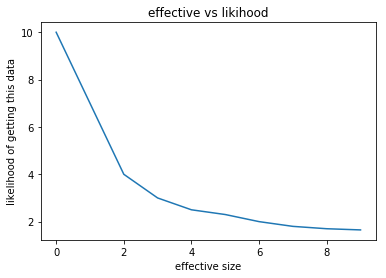

In [11]:
plt.plot(x,y)
plt.ylabel('likelihood of getting this data')
plt.xlabel('effective size')
plt.title('effective vs likihood')